## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

In [3]:
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [5]:
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [6]:
transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


## Merge the datasets

In [7]:
# Merging the cab data with transaction id data as both have common column transaction ID

cab_txn = pd.merge(cab, transaction, on= 'Transaction ID', how='inner')
cab_txn

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [8]:
# Merging the cab_txn data with customer data as both have common column customer ID

cab_txn_cust = pd.merge(cab_txn, customer, on = 'Customer ID', how='inner')
cab_txn_cust

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417
359388,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
359389,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
359390,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454


In [9]:
final_data = pd.merge(cab_txn_cust, city, on='City', how='inner')
final_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


In [10]:
final_data.set_index('Transaction ID', inplace = True)
final_data.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
Transaction ID,,,,,,,,,,,,,
10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [11]:
print(f' Final Data : rows {final_data.shape[0]}, columns {final_data.shape[1]}')

 Final Data : rows 359392, columns 13


**Final data has 359392 rows with 13 columns**

## Data Exploration

### Visualization

In [12]:
num_cols = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users']

cat_cols = ['Company', 'City', 'Payment_Mode', 'Gender']

In [13]:
final_data['Income (USD/Month)'].dtype

dtype('int64')

In [14]:
final_data['Income (USD/Month)'] = final_data['Income (USD/Month)'].astype(str).str.replace(',','').str.strip().astype(float)

In [15]:
final_data['Income (USD/Month)'].dtype

dtype('float64')

In [16]:
final_data['Population'] = final_data['Population'].astype(str).str.replace(',','').str.strip().astype(float)

In [17]:
final_data['Population'].dtype

dtype('float64')

In [18]:
for i in num_cols:
    print(f"{i} --> {final_data[i].unique()[:5]}")

KM Travelled --> [30.45 26.19 42.55 28.62 36.38]
Price Charged --> [370.95 598.7  792.05 358.52 721.1 ]
Cost of Trip --> [313.635  317.4228 597.402  334.854  467.1192]
Age --> [28 27 53 23 33]
Income (USD/Month) --> [10813.  9237. 11242. 23327.  8536.]
Population --> [ 814885.  698371.  248968. 1955130.  942908.]
Users --> [' 24,701 ' ' 14,978 ' ' 80,021 ' ' 164,468 ' ' 22,157 ']


In [19]:
final_data['Users'] = final_data['Users'].astype(str).str.replace(',','').str.strip().astype(float)

In [20]:
final_data['Users'].dtype

dtype('float64')

#### Univariate Analysis for Numerical Columns

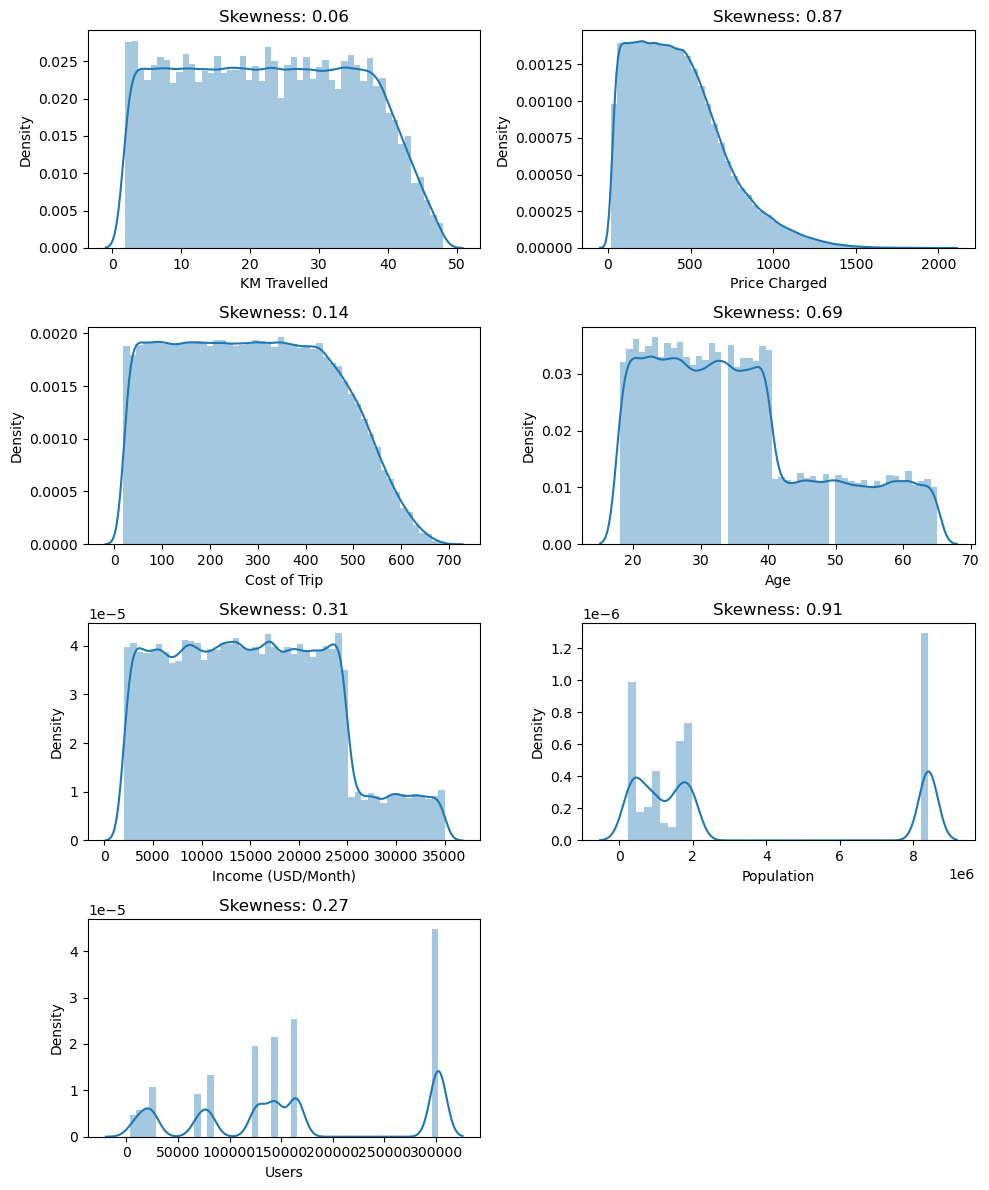

In [21]:
t = 1
plt.figure(figsize = [10,12])
for i in num_cols:
    plt.subplot(4,2,t)
    sns.distplot(final_data[i])
    plt.title(f'Skewness: {round(final_data[i].skew(),2)}')
    t = t+1
plt.tight_layout()
plt.show()

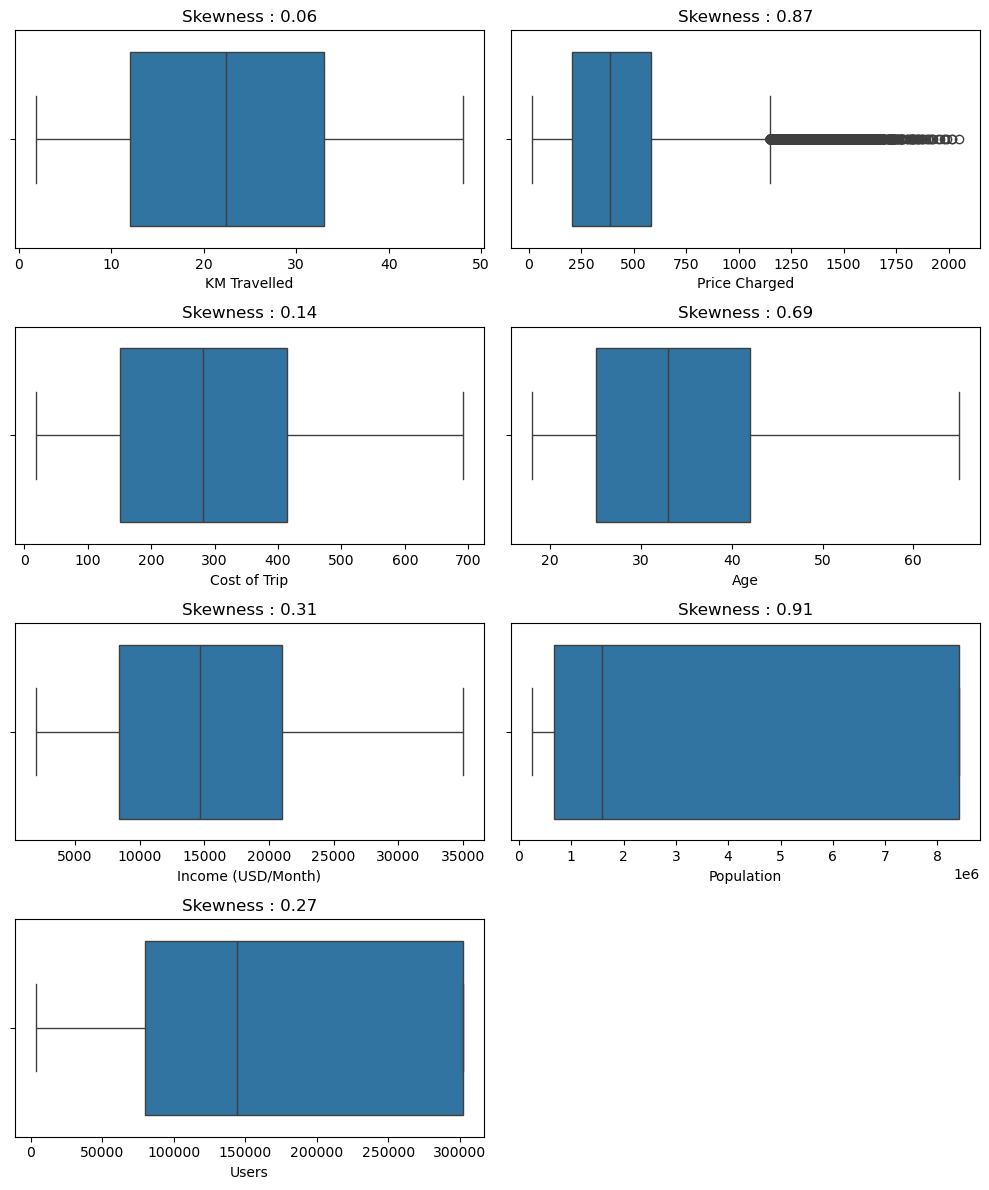

In [22]:
t = 1
plt.figure(figsize=[10,12])
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data = final_data, x=i)
    plt.title(f'Skewness : {round(final_data[i].skew(),2)}')
    t = t+1
plt.tight_layout()
plt.show()

Inference : There is positive skewness in all columns but price charged and population column is showing highest skewness among all others i.e., 0.87 and 0.91 respectively and then comes age column i.e., 0.69 and price charged has extreme outliers also which can be seen in boxplot chart.

#### Univariate Analysis for Categorical Columns

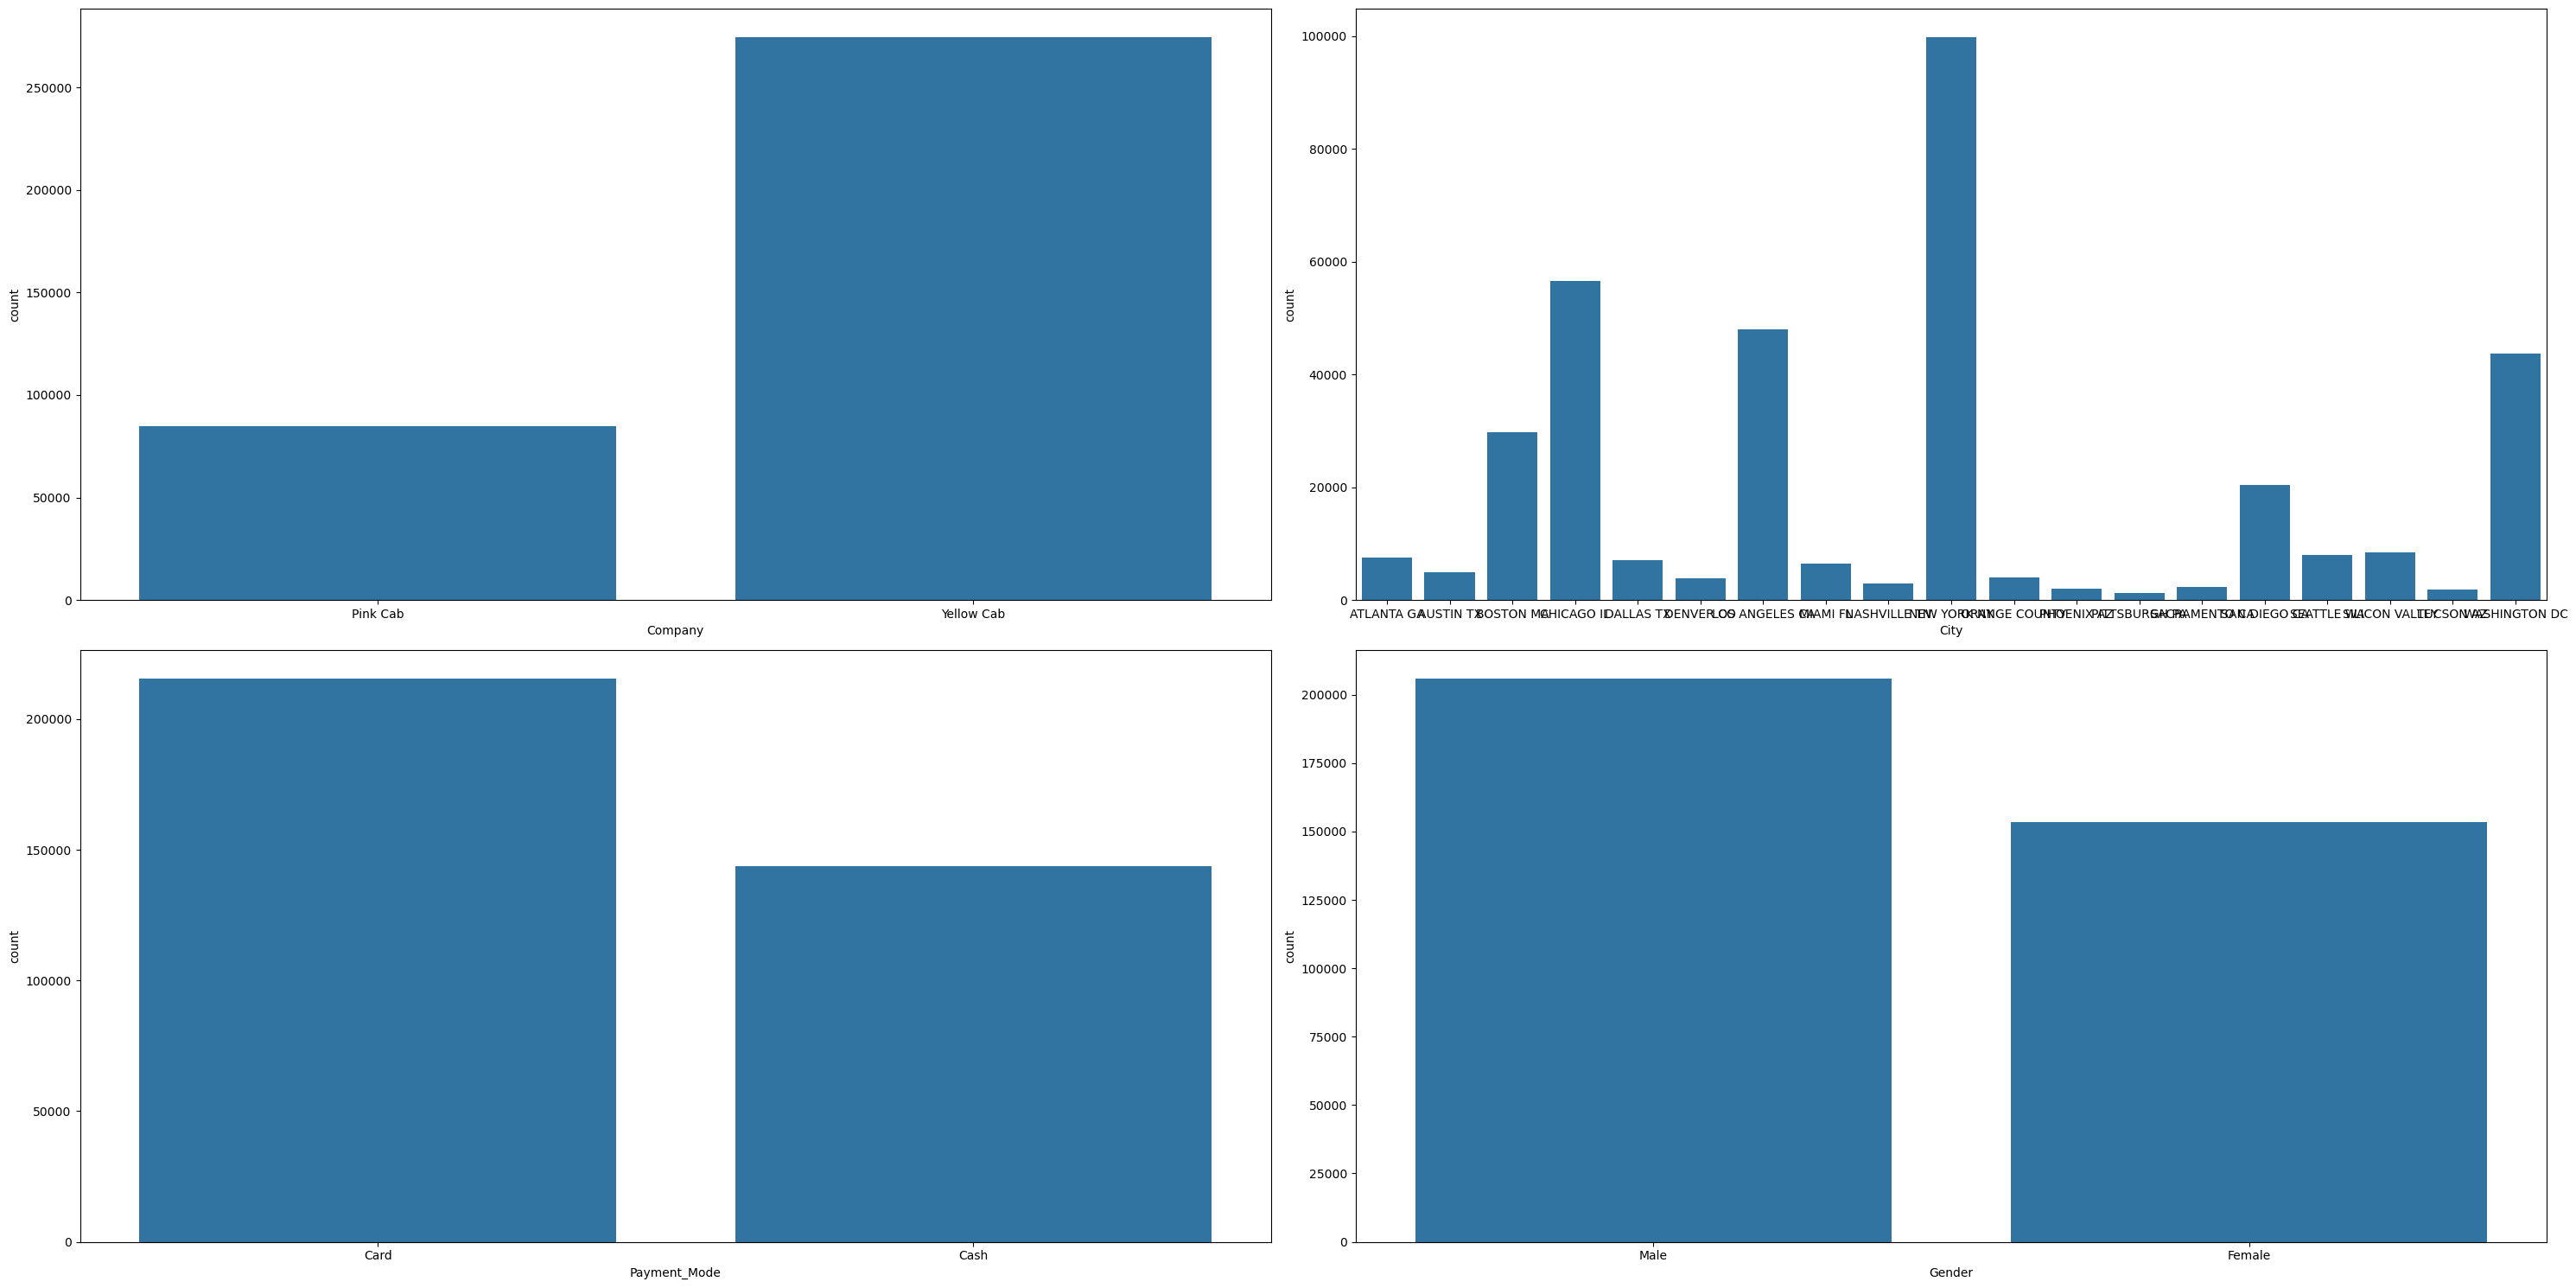

In [23]:
t = 1
plt.figure(figsize=[30,15])
for i in cat_cols:
    plt.subplot(2,2,t)
    sns.countplot(data = final_data, x=i)
    t = t+1
plt.tight_layout()
plt.show()

Inference : 

* There is a high population of people who resides in New York and are cab users as well
* Mostly yellow cab is preferred than pink cab
* Mostly the payment is done using card
* There are mostly male customers than female customers who uses cab services 

#### Bivariate Analysis for numerical vs numerical columns

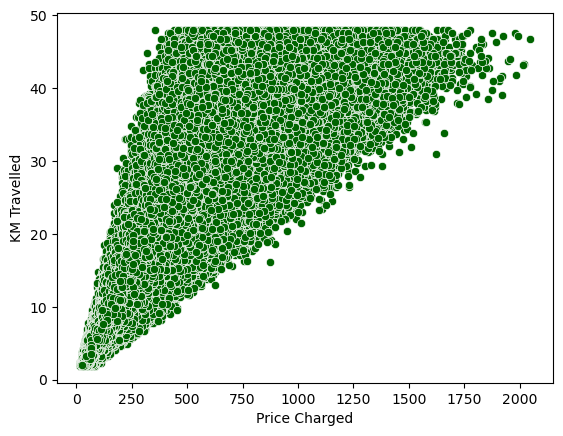

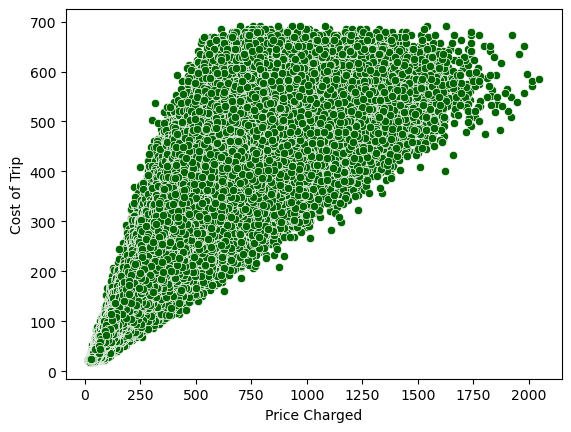

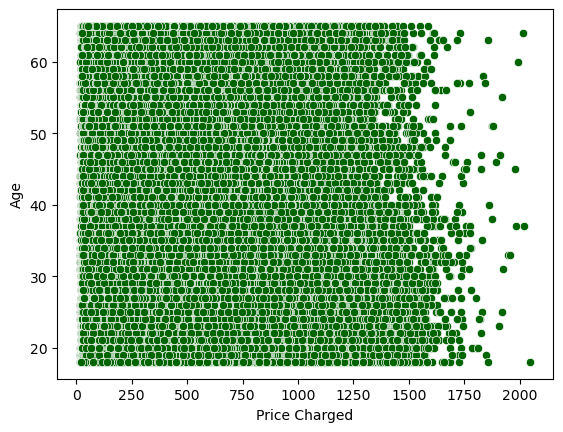

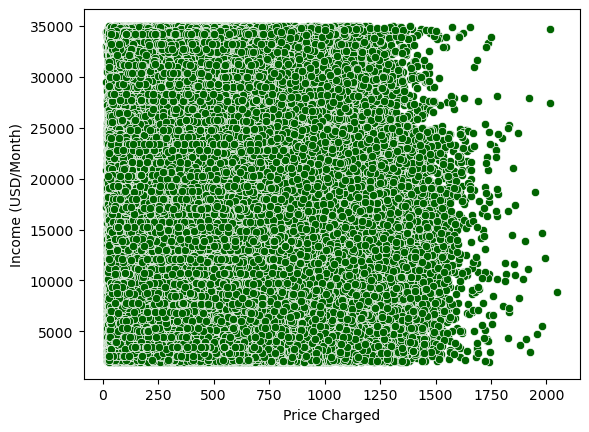

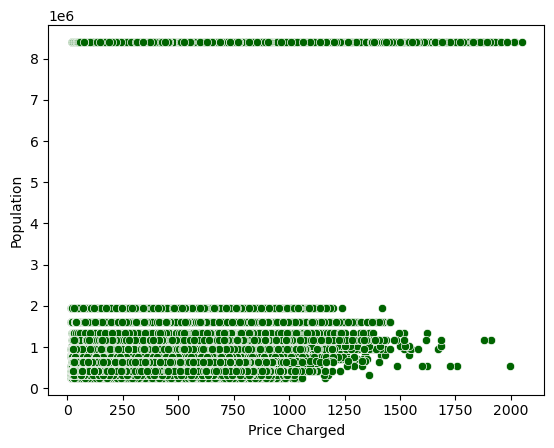

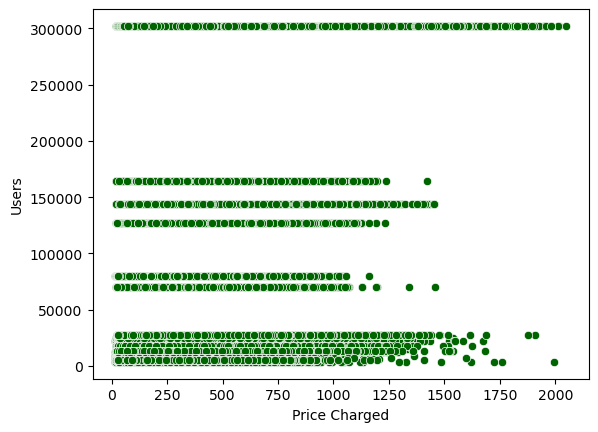

In [24]:
for i in num_cols:
    if i != 'Price Charged':
        sns.scatterplot(data = final_data, x='Price Charged', y=i, color = 'darkgreen')
        plt.show()

Inference : 
    
* Price charged depends on the distance travelled by the customer - the more kilometers travelled, the higher the price
* The cost of trip varies saignificantly with the price charged; initially, the trip cost might be low, but later the price charged can be very high
* Age and income do not have any noticeable impact on the price charged
* There is no population between 2 and 8 (units not specified), which means most of the population lies between just above 0 and 2, with some above 8 - but this doesn't significantaly affect the price charged
* Similarly, the number of users does not make a significant difference in the price charged, whether there are few users or many

#### Bivariate Analysis for numerical vs categorical columns

<Figure size 1000x1200 with 0 Axes>

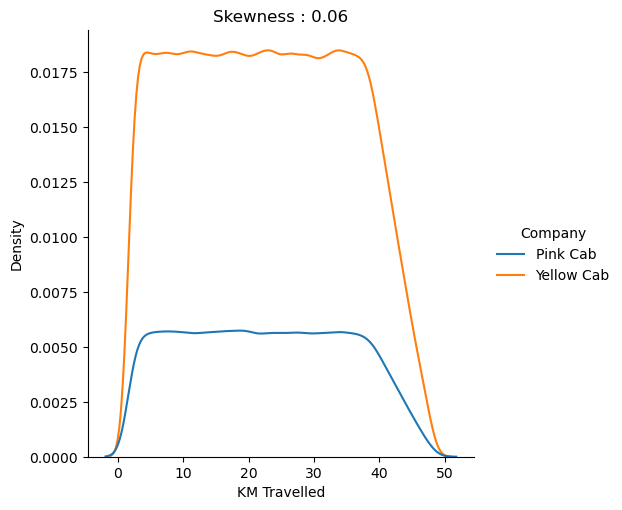

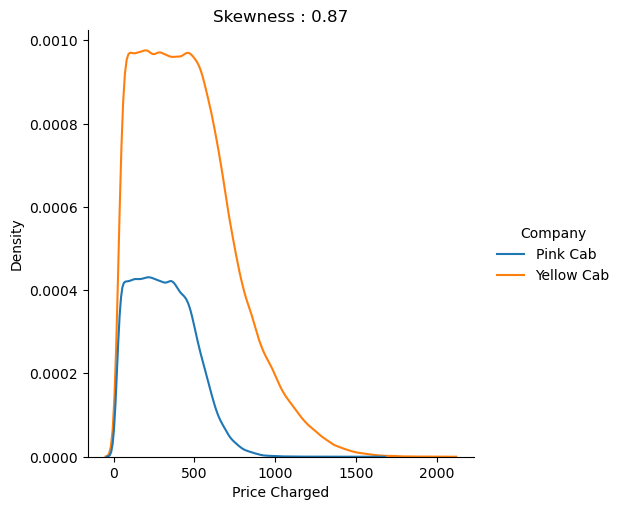

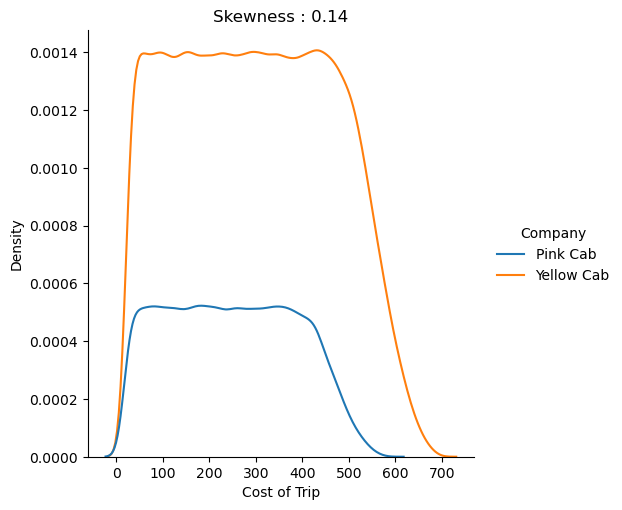

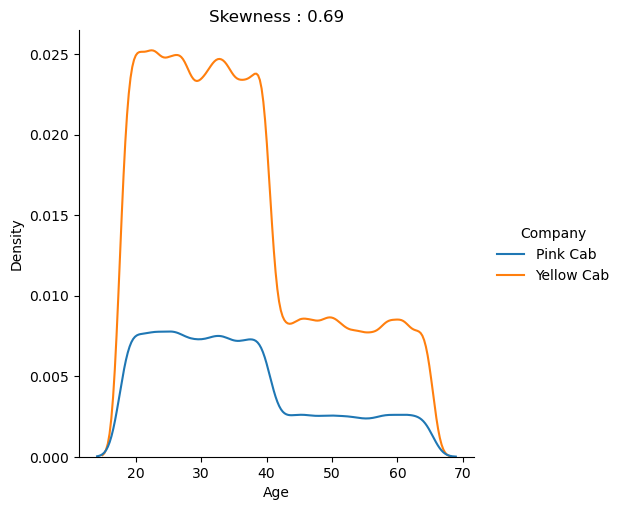

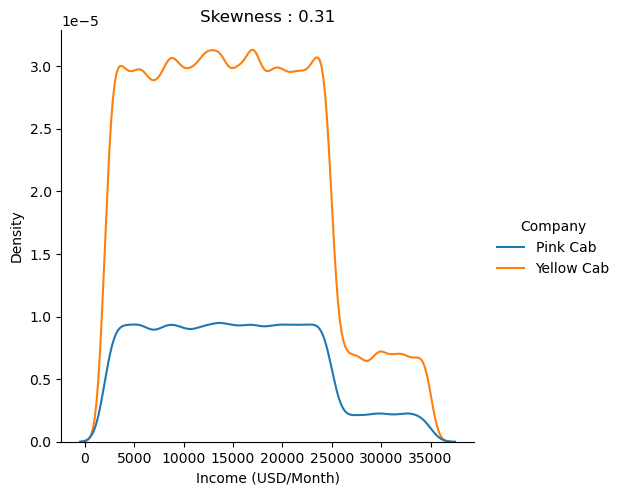

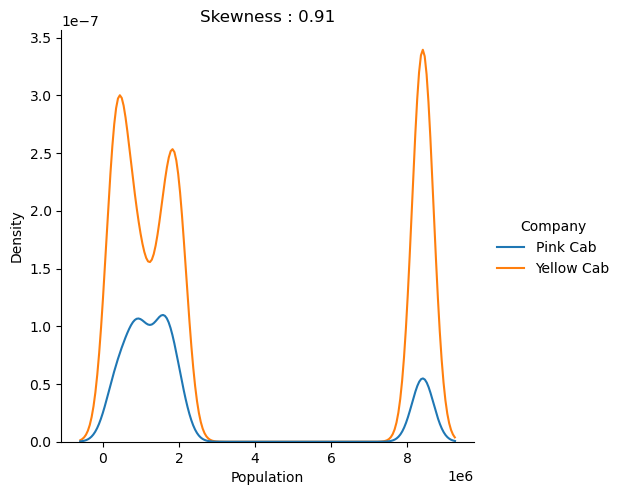

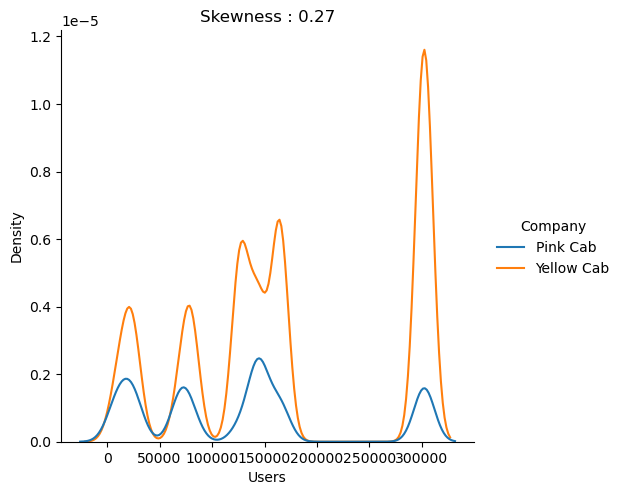

In [25]:
plt.figure(figsize = [10,12])
for i in num_cols:
    sns.displot(data = final_data, x=i, kind='kde', hue='Company')
    plt.title(f'Skewness : {round(final_data[i].skew(),2)}')
plt.show()   

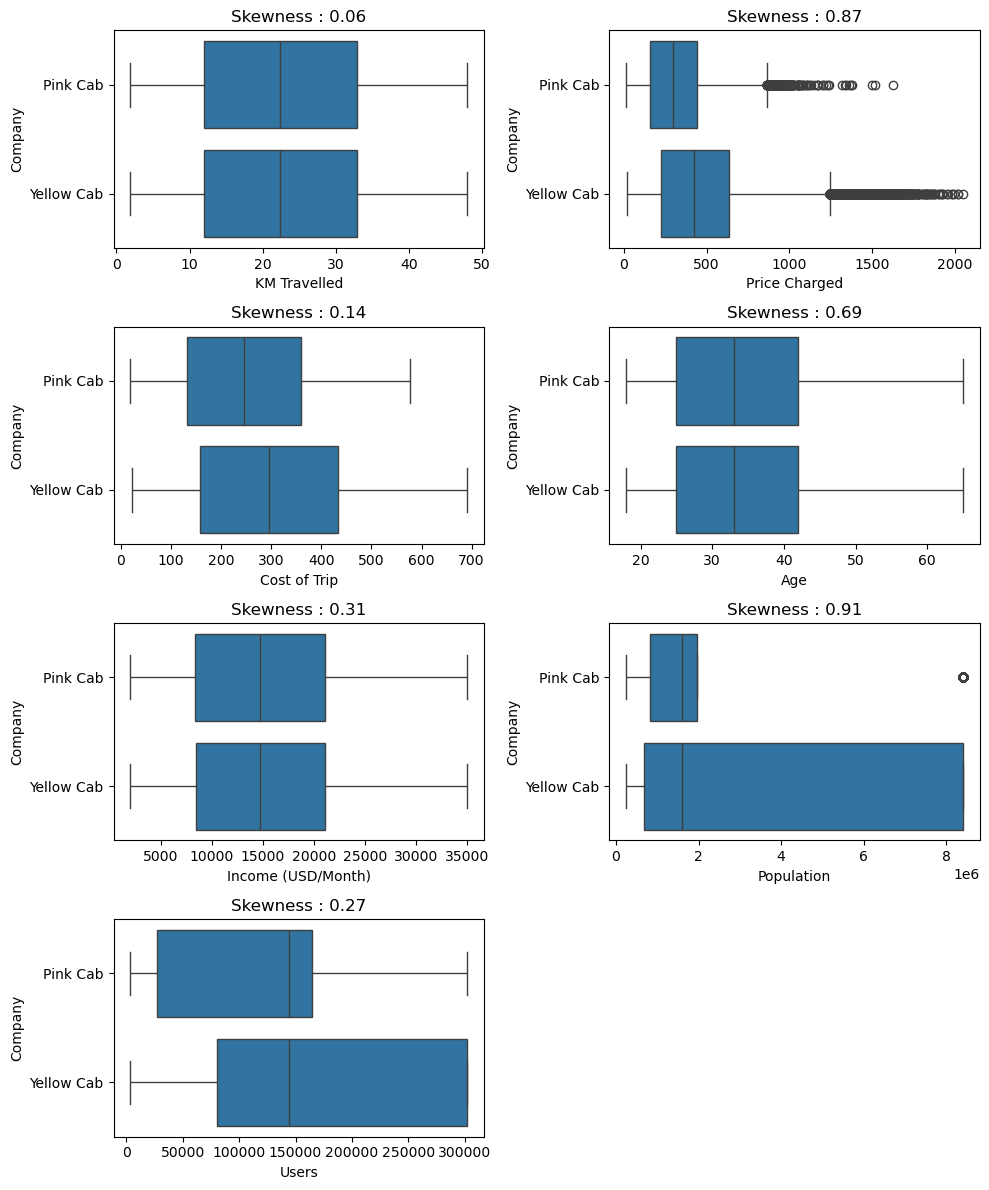

In [26]:
t = 1
plt.figure(figsize = [10,12])
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data = final_data, x=i, y='Company')
    plt.title(f'Skewness : {round(final_data[i].skew(),2)}')
    t = t+1
plt.tight_layout()
plt.show()

Inference : 
    
* Every column exhibits positive skewness
* The price charged column contains outliers, particularly high in case of yellow cabs
* An extreme outlier is observed in the population column for pink cabs

#### Bivariate Analysis for categorical vs categorical columns

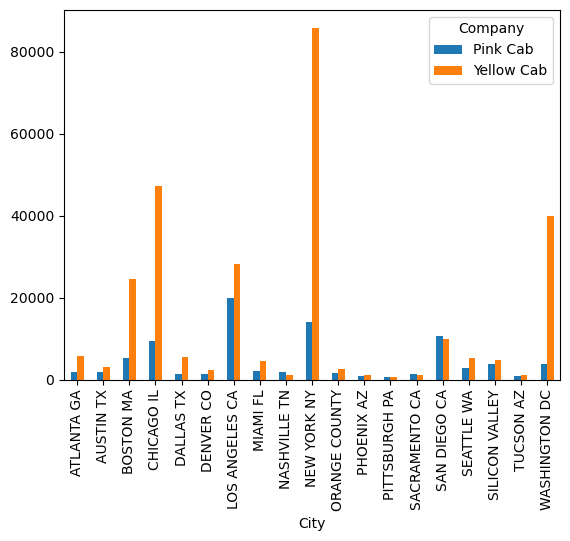

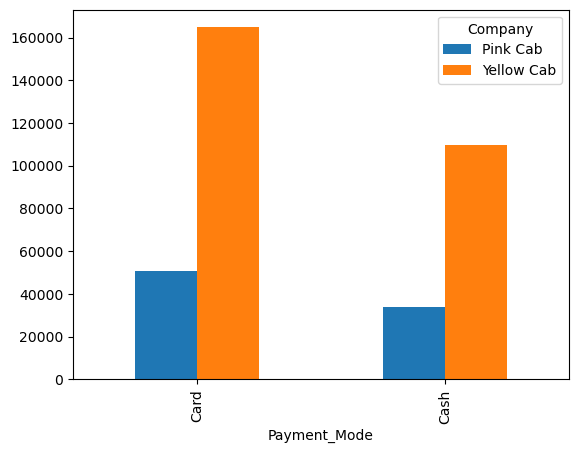

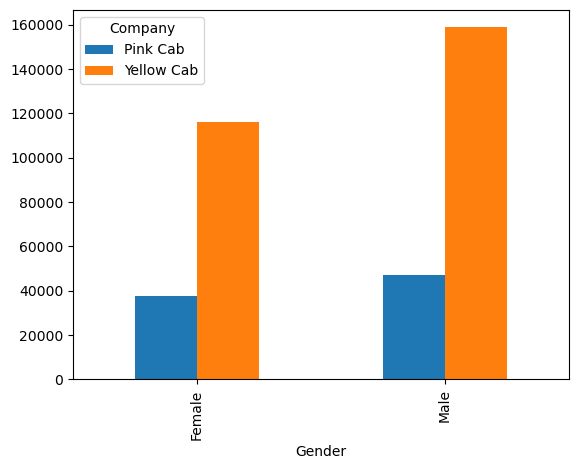

In [27]:
for i in cat_cols:
    if i != 'Company':
        pd.crosstab(index = final_data[i], columns = final_data['Company']).plot(kind='bar')
plt.show()   

Inference : 

* In New York city, cab usage is the highest among all cities, and yellow cabs are used more than pink cabs. On average, yellow cabs are preferred over pink cabs across all cities
* Most customers paid by card for yellow cabs, although some also paid in cash 
* Most cab users are male, with a higher preference for yellow cabs compared to female users

#### Multivariate Analysis

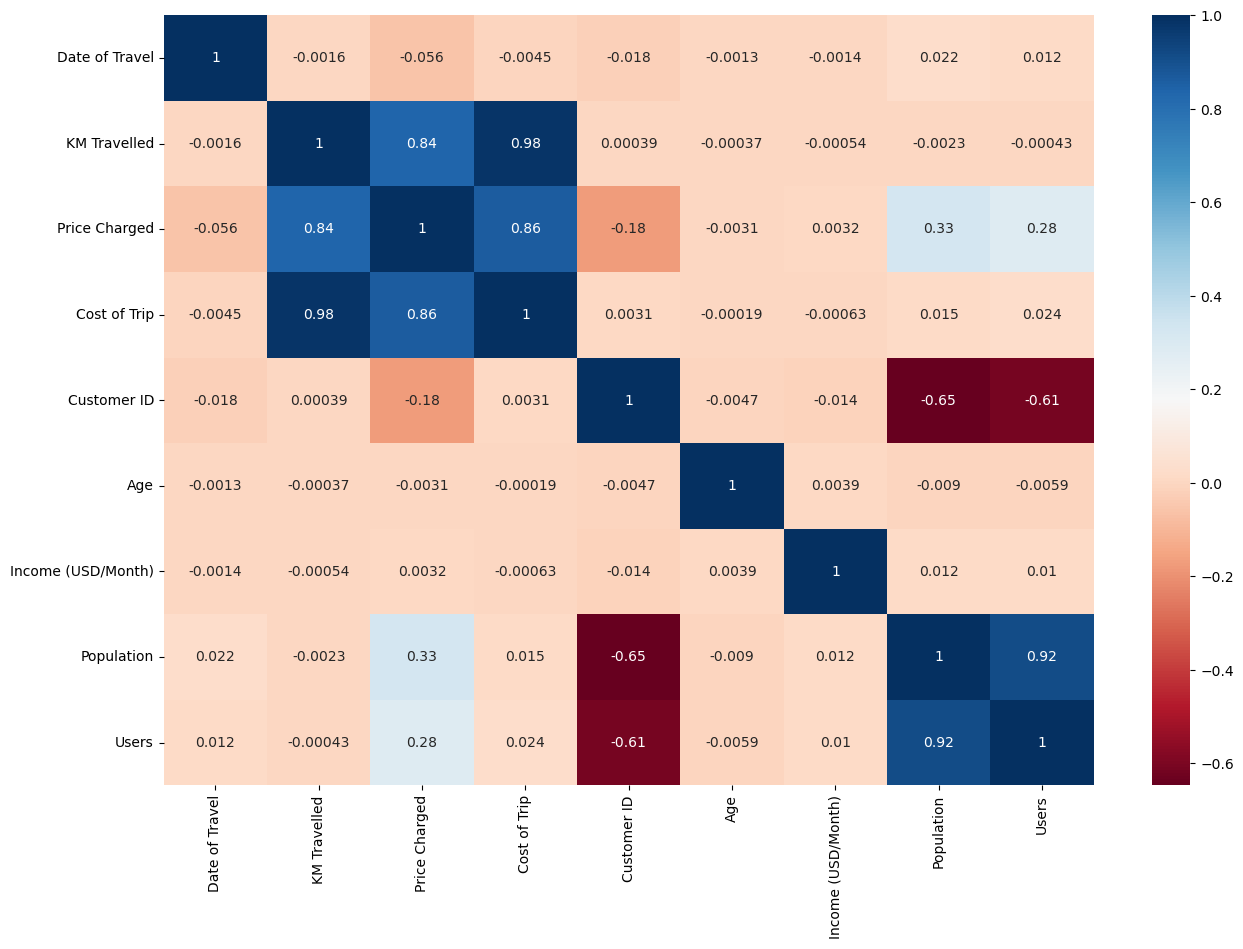

In [28]:
plt.figure(figsize=[15,10])
sns.heatmap(final_data.corr(numeric_only=True), annot=True, cmap='RdBu')
plt.show()

#### Time Series Data

In [29]:
daily_counts = final_data.groupby(['Date of Travel', 'Company']).size().reset_index(name='Booking Count')
daily_counts

,Date of Travel,Company,Booking Count
0,42371,Pink Cab,41
1,42371,Yellow Cab,140
2,42372,Pink Cab,52
3,42372,Yellow Cab,126
4,42373,Pink Cab,4
...,...,...,...
2185,43463,Yellow Cab,630
2186,43464,Pink Cab,56
2187,43464,Yellow Cab,201
2188,43465,Pink Cab,58


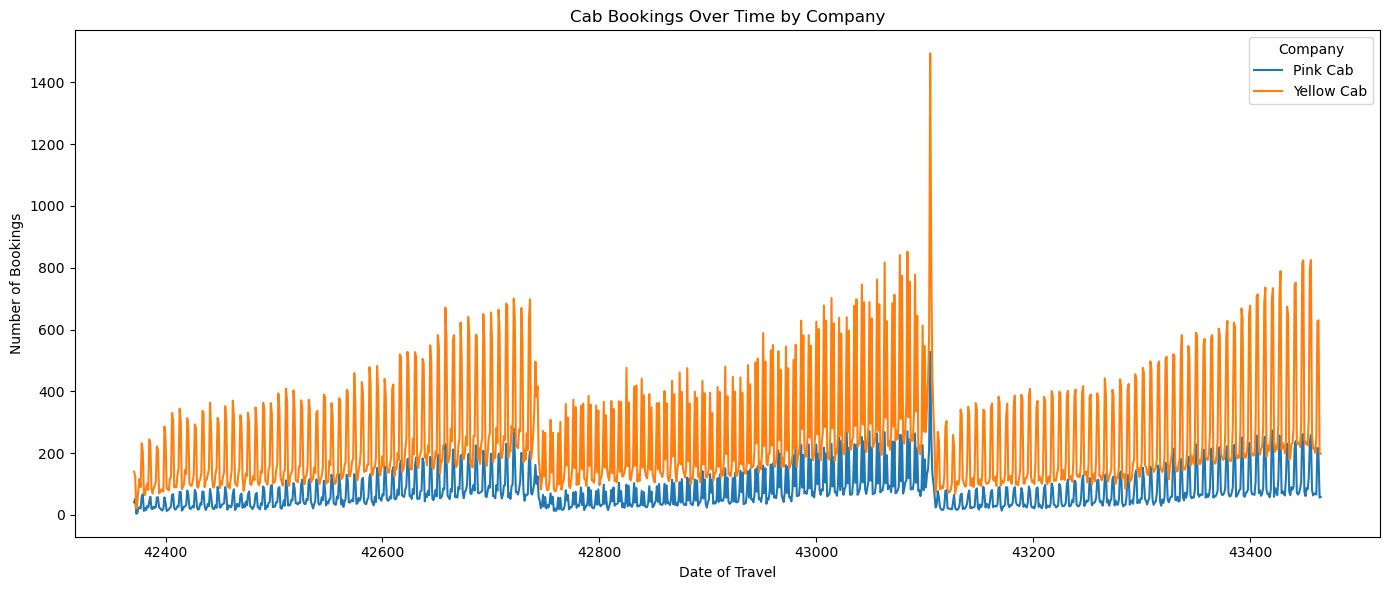

In [30]:
plt.figure(figsize=(14,6))
sns.lineplot(data=daily_counts, x='Date of Travel', y='Booking Count', hue='Company')

plt.title('Cab Bookings Over Time by Company')
plt.xlabel('Date of Travel')
plt.ylabel('Number of Bookings')
plt.legend(title='Company')
plt.tight_layout()
plt.show()

## Inferential Statistics

### Hypothesis Testing

We don't have confidence interval here, so we take it as 95% which is the standard value which means alpha is 0.05

In [31]:
# Check for assumptions

# Assumption 1 : Check the normality
# Ho : Data is normal
# Ha : Data is not normal

print(stats.shapiro(final_data['Date of Travel']))
print(stats.shapiro(final_data['Price Charged']))

ShapiroResult(statistic=0.9569613337516785, pvalue=0.0)
ShapiroResult(statistic=0.9465842843055725, pvalue=0.0)


* Since our p_value is less than alpha (p_value<alpha), both columns i.e., Date of Travel and Price Charged are not normal
* Hence, we perform non-parametric test here i.e., Spearman's correlation test

**Spearman's Correlation Test**

In [32]:
# To check, is there any significant relationship between the date of travel and price charged
# Ho = There is no significant correlation (independent samples) between date of travel and price charged
# Ha = There is significant correlation (dependent samples) between date of travel and price charged

print(stats.spearmanr(final_data['Date of Travel'], final_data['Price Charged']))

SignificanceResult(statistic=-0.04154724595564736, pvalue=4.753147406724094e-137)


* Our p_value is less than alpha (p_value<alpha), so it's rejecting null hypothesis or we can say that there is a significant correlation between date of travel and the price charged

In [33]:
# Check for assumptions

# Assumption 1 : Check the normality
# Ho : Data is normal
# Ha : Data is not normal

print(stats.shapiro(final_data['KM Travelled']))
print(stats.shapiro(final_data['Price Charged']))

ShapiroResult(statistic=0.9631290435791016, pvalue=0.0)
ShapiroResult(statistic=0.9465842843055725, pvalue=0.0)


* Since our p_value is less than alpha (p_value<alpha), both columns i.e., KM Travelled and Price Charged are not normal
* Hence, we perform non-parametric test i.e., Spearman's correlation test

**Spearman's Correlation Test**

In [34]:
# To check, is there any significant relationship between the kilometers travelled and price charged
# Ho = There is no significant correlation (independent samples) between kilometers travelled and price charged
# Ha = There is significant correlation (dependent samples) between kilometers travelled and price charged

print(stats.spearmanr(final_data['KM Travelled'], final_data['Price Charged']))

SignificanceResult(statistic=0.8929579061229201, pvalue=0.0)


* Our p_value is less than alpha (p_value<alpha), so it's rejecting null hypothesis or we can say that there is a significant correlation between the distance travelled and the price charged

In [35]:
# Check for assumptions

# Assumption 1 : Check the normality
# Ho : Data is normal
# Ha : Data is not normal

print(stats.shapiro(final_data['Cost of Trip']))
print(stats.shapiro(final_data['Price Charged']))

ShapiroResult(statistic=0.9688271284103394, pvalue=0.0)
ShapiroResult(statistic=0.9465842843055725, pvalue=0.0)


* Since our p_value is less than alpha (p_value<alpha), both columns i.e., Cost of Trip and Price Charged are not normal
* Hence, we perform non-parametric test i.e., Spearman's correlation test

**Spearman's Correlation Test**

In [36]:
# To check, is there any significant relationship between the cost of trip and price charged
# Ho = There is no significant correlation (independent samples) between cost of trip and price charged
# Ha = There is significant correlation (dependent samples) between cost of trip and price charged

print(stats.spearmanr(final_data['Cost of Trip'], final_data['Price Charged']))

SignificanceResult(statistic=0.9135811393768511, pvalue=0.0)


* p_value is less than alpha (p_value<alpha), so it's rejecting null hypothesis or we can say that there is a significant correlation between the cost of trip and the price charged

In [37]:
# Check for assumptions

# Assumption 1 : Check the normality
# Ho : Data is normal
# Ha : Data is not normal

print(stats.shapiro(final_data['Age']))
print(stats.shapiro(final_data['Price Charged']))

ShapiroResult(statistic=0.9325872659683228, pvalue=0.0)
ShapiroResult(statistic=0.9465842843055725, pvalue=0.0)


* Since our p_value is less than alpha (p_value<alpha), both columns i.e., Age and Price Charged are not normal
* Hence, we perform non-parametric test i.e., Spearman's correlation test

**Spearman's Correlation Test**

In [38]:
# To check, is there any significant relationship between age and price charged
# Ho = There is no significant correlation (independent samples) between age and price charged
# Ha = There is significant correlation (dependent samples) between age and price charged

print(stats.spearmanr(final_data['Age'], final_data['Price Charged']))

SignificanceResult(statistic=-0.001987863872060176, pvalue=0.2333758598791871)


* Here our p_value is greater than alpha (p_value>alpha) means its accepting null hypothesis which says that there is no significant correlation between age and price charged and so, both are independent samples

In [39]:
# Check for assumptions

# Assumption 1 : Check the normality
# Ho : Data is normal
# Ha : Data is not normal

print(stats.shapiro(final_data['Income (USD/Month)']))
print(stats.shapiro(final_data['Price Charged']))

ShapiroResult(statistic=0.9713863730430603, pvalue=0.0)
ShapiroResult(statistic=0.9465842843055725, pvalue=0.0)


* Since our p_value is less than alpha (p_value<alpha), both columns i.e., Income and Price Charged are not normal
* Hence, we perform non-parametric test i.e., Spearman's correlation test

**Spearman's Correlation Test**

In [40]:
# To check, is there any significant relationship between income and price charged
# Ho = There is no significant correlation (independent samples) between income and price charged
# Ha = There is significant correlation (dependent samples) between income and price charged

print(stats.spearmanr(final_data['Income (USD/Month)'], final_data['Price Charged']))

SignificanceResult(statistic=0.0028657789338734216, pvalue=0.0857943710437447)


* Here also our p_value is greater than alpha (p_value>alpha) means its accepting null hypothesis which says that there is no significant correlation between income and price charged, hence both are independent samples

In [41]:
# Check for assumptions

# Assumption 1 : Check the normality
# Ho : Data is normal
# Ha : Data is not normal

print(stats.shapiro(final_data['Population']))
print(stats.shapiro(final_data['Price Charged']))

ShapiroResult(statistic=0.6882047653198242, pvalue=0.0)
ShapiroResult(statistic=0.9465842843055725, pvalue=0.0)


* Since our p_value is less than alpha (p_value<alpha), both columns i.e., Population and Price Charged are not normal
* Hence, we perform non-parametric test i.e., Spearman's correlation test

**Spearman's Correlation Test**

In [42]:
# To check, is there any significant relationship between population and price charged
# Ho = There is no significant correlation (independent samples) between population and price charged
# Ha = There is significant correlation (dependent samples) between population and price charged

print(stats.spearmanr(final_data['Population'], final_data['Price Charged']))

SignificanceResult(statistic=0.2075610331422856, pvalue=0.0)


* Here, also p_value is less than alpha (p_value<alpha), so it's rejecting null hypothesis or we can say that there is a significant correlation between population and price charged

In [43]:
# Check for assumptions

# Assumption 1 : Check the normality
# Ho : Data is normal
# Ha : Data is not normal

print(stats.shapiro(final_data['Users']))
print(stats.shapiro(final_data['Price Charged']))

ShapiroResult(statistic=0.87030428647995, pvalue=0.0)
ShapiroResult(statistic=0.9465842843055725, pvalue=0.0)


* Since our p_value is less than alpha (p_value<alpha), both columns i.e., Users and Price Charged are not normal
* Hence, we perform non-parametric test i.e., Spearman's correlation test

**Spearman's Correlation Test**

In [44]:
# To check, is there any significant relationship between users and price charged
# Ho = There is no significant correlation (independent samples) between users and price charged
# Ha = There is significant correlation (dependent samples) between users and price charged

print(stats.spearmanr(final_data['Users'], final_data['Price Charged']))

SignificanceResult(statistic=0.19826810856694155, pvalue=0.0)


* Here, also p_value is less than alpha (p_value<alpha), so it's rejecting null hypothesis or we can say that there is a significant correlation between users and price charged

**Chi Square Test**

In [45]:
date_company = pd.crosstab(final_data['Date of Travel'], final_data['Company'])
date_company

Company,Pink Cab,Yellow Cab
Date of Travel,,
42371,41,140
42372,52,126
42373,4,21
42374,6,41
42375,23,86
...,...,...
43461,66,252
43462,217,626
43463,195,630


In [46]:
# To determine whether there is a significant association between date and the type of cab company used
# Ho : There is no association between date and the type of cab used
# Ha : There is association between date and the type of cab used

chi_sq, p_value, dof, expected_date = stats.chi2_contingency(date_company)
print(chi_sq, p_value)

if p_value<0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

2456.2122397966305 2.9364108836105087e-106
reject Ho


* Our test is rejecting null hypothesis means there is association between the dates and the types of cabs used

In [47]:
city_company = pd.crosstab(final_data['City'], final_data['Company'])
city_company

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


In [48]:
# To determine whether there is a significant correlation between city and the type of cab company used
# Ho : There is no correlation between city and the type of cab used
# Ha : There is correlation between city and the type of cab used

chi_sq, p_value, dof, expected_city = stats.chi2_contingency(city_company)
print(chi_sq, p_value)

if p_value<0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

39825.16829453775 0.0
reject Ho


* It is accepting our alternate hypothesis which means there is correlation between city and the type of the cab used

In [49]:
payment_company = pd.crosstab(final_data['Payment_Mode'], final_data['Company'])
payment_company

Company,Pink Cab,Yellow Cab
Payment_Mode,,
Card,50719,164785
Cash,33992,109896


In [50]:
# To determine whether there is a significant correlation between the payment mode and the type of cab 
# Ho : There is no correlation between payment mode and the type of cab 
# Ha : There is correlation between payment mode and the type of cab 

chi_sq, p_value, dof, expected_payment = stats.chi2_contingency(payment_company)
print(chi_sq, p_value)

if p_value<0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

0.3733235887859897 0.5411981778304723
fail to reject Ho


* It means our test results accepts null hypothesis that means there is no correlation between the payment mode customer used and the type of the cab

In [51]:
gender_company = pd.crosstab(final_data['Gender'], final_data['Company'])
gender_company

Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


In [52]:
# To determine whether there is a significant association between the gender of the customer and the type of cab 
# Ho : There is no association between the gender of the customer and the type of cab 
# Ha : There is association between the gender of the customer and the type of cab 

chi_sq, p_value, dof, expected_gender = stats.chi2_contingency(gender_company)
print(chi_sq, p_value)

if p_value<0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

107.22063897254299 3.982674650131372e-25
reject Ho


* Our test result says there is some correlation between the gender of the customer and the type of the cabs

## Data Preprocessing

### Check for defects

**Missing Values**

In [53]:
final_data.isnull().sum().sum()

0

* There are no null values in the final dataset after merging all files

**Duplicates**

In [54]:
final_data[final_data.duplicated()]

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
Transaction ID,,,,,,,,,,,,,


* There are no duplicate values in the dataset

**Outliers**

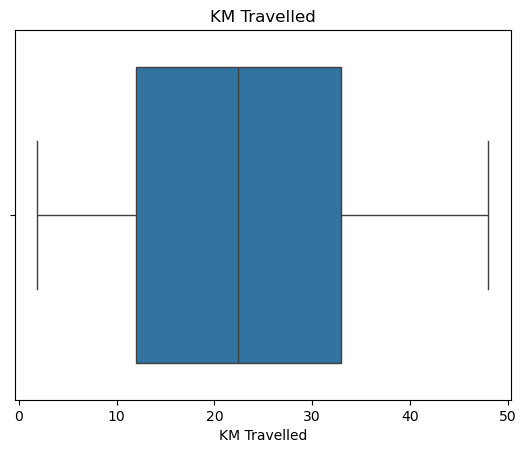

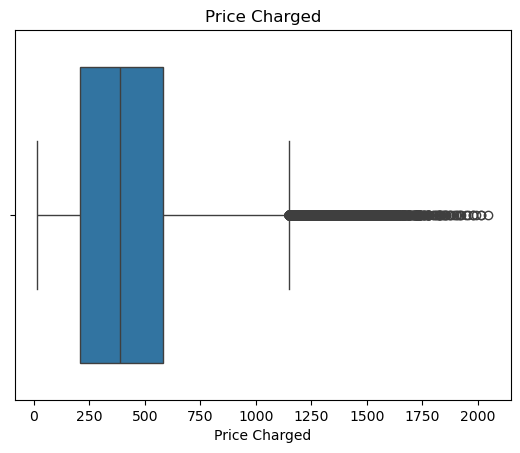

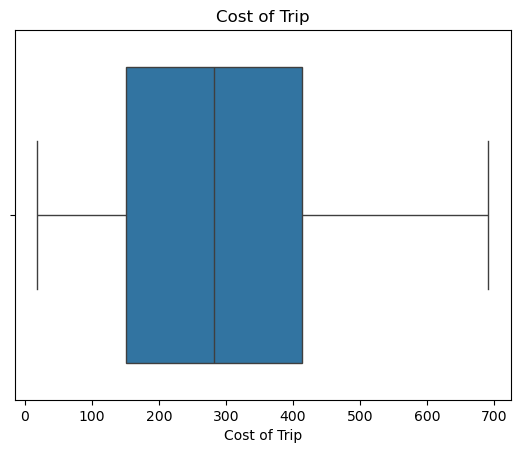

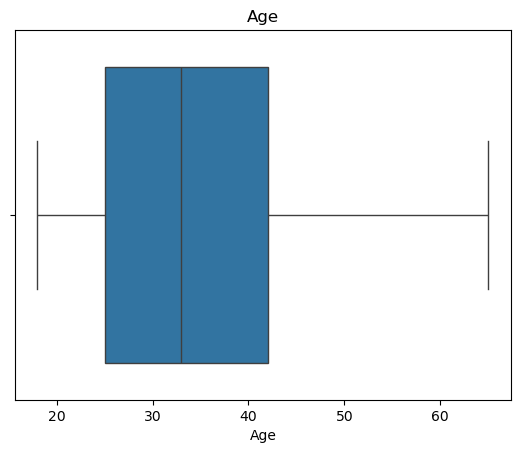

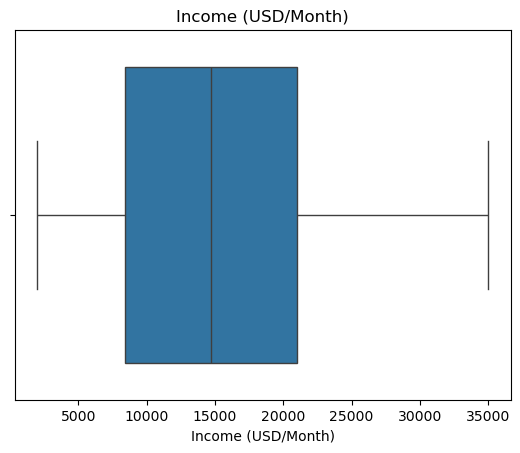

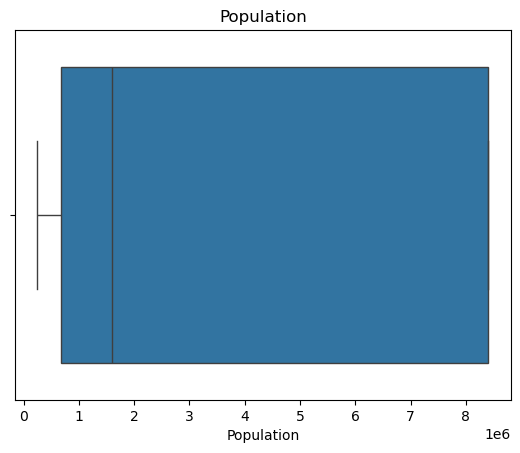

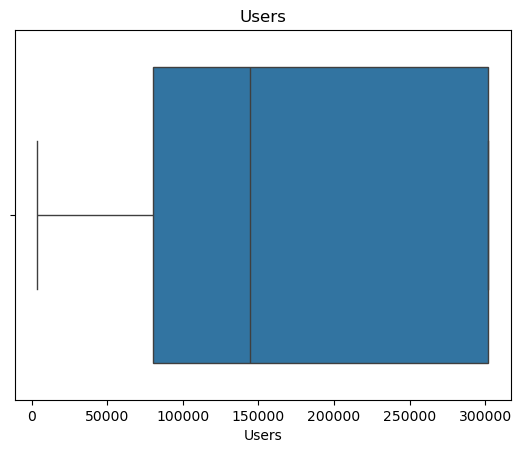

In [55]:
for i in num_cols:
    sns.boxplot(final_data[i], orient='h')
    plt.title(i)
    plt.show()

* As we can see that the price charged column has huge number of outliers and rest no other column has outliers, so, we will cap the outliers using IQR method

In [56]:
for i in num_cols:
    q3, q1 = np.percentile(final_data[i], [75,25])
    iqr = q3-q1
    ul, ll = q3+1.5*iqr, q1-1.5*iqr
    final_data[i] = final_data[i].apply(lambda x: ll if x<ll else ul if x>ul else x)

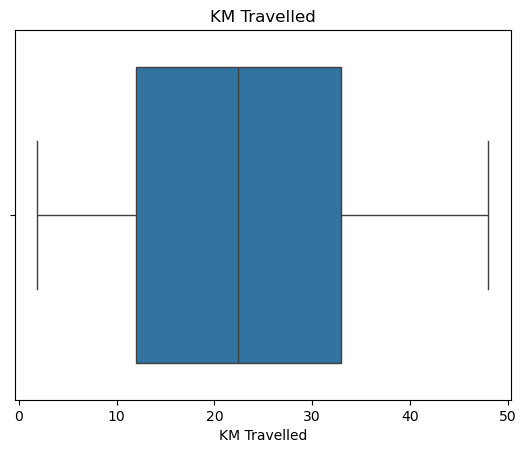

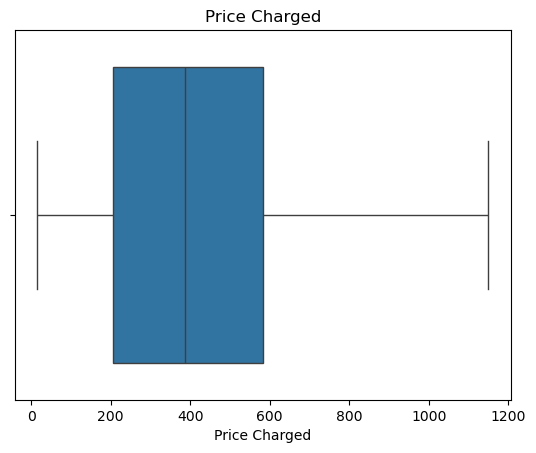

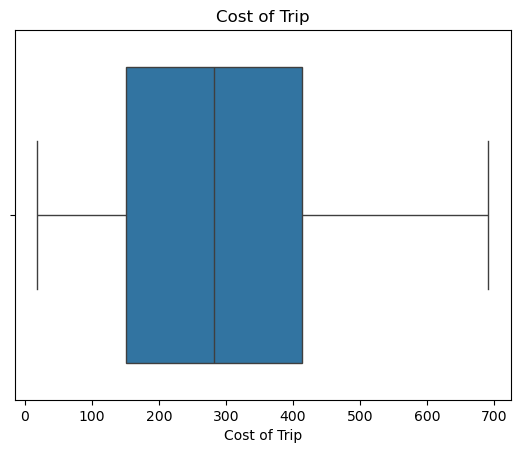

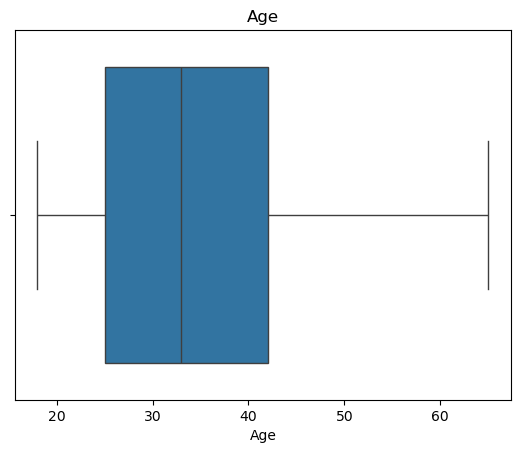

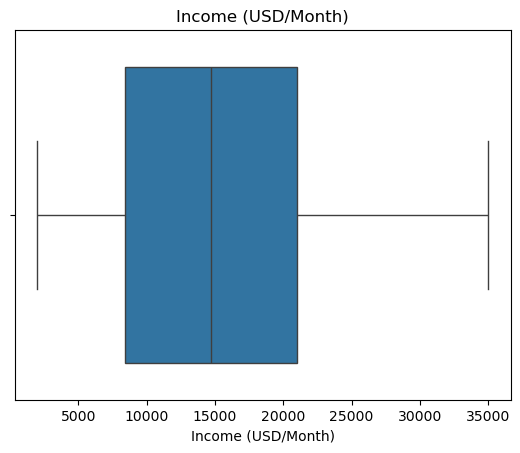

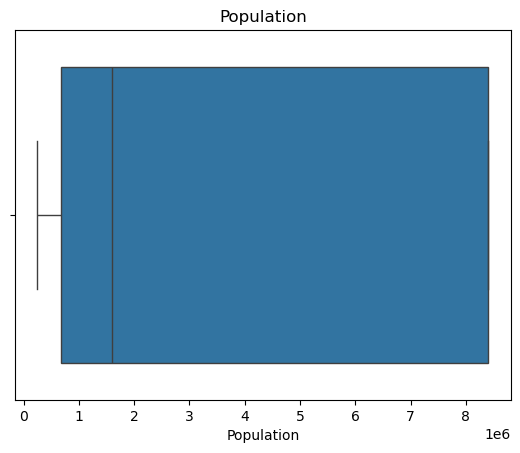

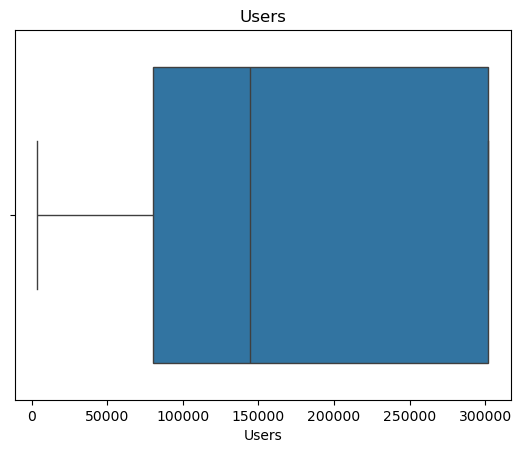

In [57]:
for i in num_cols:
    sns.boxplot(final_data[i], orient='h')
    plt.title(i)
    plt.show()

* Now we can see here that price charged column has no outliers left

### Feature Engineering

In [58]:
final_data['Date of Travel'] = pd.to_datetime(final_data['Date of Travel'])

In [59]:
final_data['Date of Travel'].dt.weekday

Transaction ID
10000011    3
10351127    3
10412921    3
10000012    3
10320494    3
           ..
10307228    3
10319775    3
10347676    3
10358624    3
10370709    3
Name: Date of Travel, Length: 359392, dtype: int32

In [60]:
final_data['travel_day'] = final_data['Date of Travel'].dt.day
final_data['travel_month'] = final_data['Date of Travel'].dt.month
final_data['travel_weekday'] = final_data['Date of Travel'].dt.weekday

In [61]:
final_data.drop(columns=['Date of Travel'], inplace=True)

In [62]:
final_data.head()

,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,travel_day,travel_month,travel_weekday
Transaction ID,,,,,,,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813.0,814885.0,24701.0,1,1,3
10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813.0,814885.0,24701.0,1,1,3
10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813.0,814885.0,24701.0,1,1,3
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237.0,814885.0,24701.0,1,1,3
10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237.0,814885.0,24701.0,1,1,3


Inference : 

* Date column cannot be used in date time format in the model hence day, month and weekday had been extracted to make it useful

### Encoding

In [63]:
final_data.head(2)

,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,travel_day,travel_month,travel_weekday
Transaction ID,,,,,,,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813.0,814885.0,24701.0,1,1,3
10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813.0,814885.0,24701.0,1,1,3


In [64]:
cat_cols

['Company', 'City', 'Payment_Mode', 'Gender']

**Label Encoding**

In [65]:
le = LabelEncoder()

In [66]:
final_data['Company'] = le.fit_transform(final_data['Company'])

**n-1 Encoding**

In [67]:
final_data = pd.get_dummies(final_data, columns = ['City'], dtype=int, drop_first=True)

**Label Encoding**

In [68]:
final_data['Payment_Mode'] = le.fit_transform(final_data['Payment_Mode'])

**Label Encoding**

In [69]:
final_data['Gender'] = le.fit_transform(final_data['Gender'])

In [70]:
final_data.head(2)

,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,...,City_NEW YORK NY,City_ORANGE COUNTY,City_PHOENIX AZ,City_PITTSBURGH PA,City_SACRAMENTO CA,City_SAN DIEGO CA,City_SEATTLE WA,City_SILICON VALLEY,City_TUCSON AZ,City_WASHINGTON DC
Transaction ID,,,,,,,,,,,,,,,,,,,,,
10000011,0,30.45,370.95,313.6350,29290,0,1,28,10813.0,814885.0,...,0,0,0,0,0,0,0,0,0,0
10351127,1,26.19,598.70,317.4228,29290,1,1,28,10813.0,814885.0,...,0,0,0,0,0,0,0,0,0,0


* Encoding of all categorical columns are done, so now we can move to model building